Append the adjacency matrix after a diagonally filled matrix to get the matrix of importance. The first n/2 columns have only 1 non-zero elements, while the second half can have many non-zero elements. The aim is to find the minimum set of columns which upon combining will give 0. In other words, we want to find the minimum dependent columns.

In [1]:
print("No deps missing")


No deps missing


In [2]:
from graph_tools import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
from numpy.linalg import eig
import scipy

In [3]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["text.usetex"] = True
n = 5
import time

t = time.process_time()
adj_mats, g6codes = get_adj_mat(n)
elapsed_time = time.process_time() - t
l = len(adj_mats)
print(f'Returned {l} graphs in {elapsed_time} time.')

Returned 21 graphs in 0.015625 time.


In [4]:
# List of all the networkx graphs
Gs = []
# Stores all the Laplacians of every graph
Ls = []
D_list = []
dists = []
for i in adj_mats:
    al = adj_mat_to_adj_list(i)
    D_list.append(collect_combs(np.array(i))) # This is not the same D list used for parity matrix
    Gs.append(nx.from_dict_of_lists(al))
    Ls.append(csgraph.laplacian(i))
    d_dict = dict(nx.shortest_path(Gs[-1]))
    d = [[0]*n for z in range(n)]
    for j in range(0, n):
        for k in range(0, n):
            val = len(d_dict[j][k]) - 1
            if val != 0:
                d[j - 1][k - 1] = 1/val
    dists.append(d)

<class 'networkx.utils.decorators.argmap'> compilation 16:3: FutureWarning: 

shortest_path will return an iterator that yields
(node, path) pairs instead of a dictionary when source
and target are unspecified beginning in version 3.5

To keep the current behavior, use:

	dict(nx.shortest_path(G))


In [5]:
num = len(Gs)  # Total number of graphs
ncols = n  # Number of columns
nrows = num // ncols  # Number of rows
if num % ncols > 0:  # If there are any remaining graphs, add an extra row
    nrows += 1

if n <= 6:
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    
    for idx, graph in enumerate(Gs):
        row = idx // ncols
        col = idx % ncols
        if nrows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]
        nx.draw(graph, ax=ax)
    
    plt.show()

KeyboardInterrupt: 

In [ ]:
em_values = {3: [5, 6], 4: [9, 9, 10, 10, 11, 12]}

In [ ]:
eigen_values = []
eigen_vectors = []
eigen2 = []
for i in Ls:
    w, v = eig(i)
    w = sorted(w)
    eigen2.append(w[1].real)
print(eigen2)

[0.9999999999999997, 0.518805695907984, 1.0000000000000002, 0.6972243622680057, 0.8299135133739663, 0.9999999999999993, 1.9999999999999991, 1.9999999999999991, 0.3819660112501054, 0.5188056959079853, 1.0000000000000007, 0.829913513373967, 1.0000000000000009, 1.3819660112501047, 1.381966011250106, 1.5857864376269064, 2.000000000000001, 1.999999999999999, 3.0, 2.999999999999999, 4.9999999999999964]


Above, we have printed the first eigenvalue followed by the second eigenvalue. Note that the first eigenvalue is in the order of $10^{-16}$ and hence it can be safely approximated to 0. This small value might be due to the underlying algorithms approximations.

In [ ]:
detvals = []
for i in dists:
    detvals.append(abs(np.linalg.det(i)))

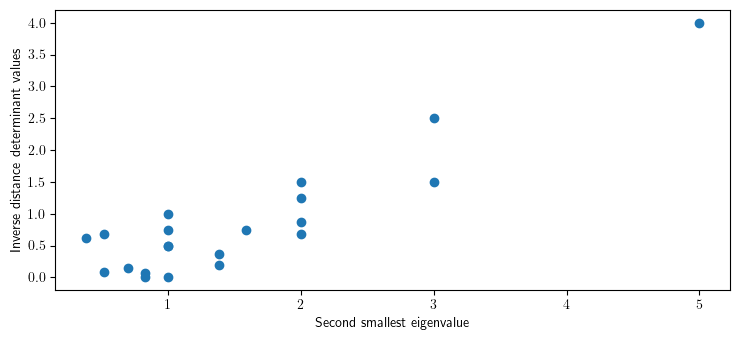

In [ ]:
plt.scatter(eigen2, detvals)
plt.xlabel("Second smallest eigenvalue")
plt.ylabel("Inverse distance determinant values")
plt.savefig(f'idd_sec{n}.png', dpi=150)

In [ ]:
import plotly.express as px
import pandas as pd
r1 = [i for i in range(len(eigen2))]
df = pd.DataFrame(data={'r1': r1, 'eigen2': eigen2, 'detvals': detvals})
fig = px.scatter(df, x='eigen2', y='detvals', title="eigen2 vs detvals", hover_data=['r1'])
# fig.update_traces(mode="markers+lines")

fig.show()

In [ ]:
if n == 4 or n == 3:
    plt.scatter(eigen2, em_values[n])
    plt.xlabel("Second smallest eigenvalue")
    plt.ylabel("Entanglement value (sum of upper diagonal)")
    plt.savefig(f'em_sec{n}.png', dpi=150)

In [ ]:
if n > 2:
    print("Between second smallest eigenvalue and inverse determinant value")
    print(scipy.stats.pearsonr(eigen2,detvals))
if n == 3 or n == 4:
    print("Between second smallest eigenvalue and entanglement value")
    print(scipy.stats.pearsonr(eigen2,em_values[n]))

Between second smallest eigenvalue and inverse determinant value
PearsonRResult(statistic=0.9059024354412122, pvalue=1.6043632559505687e-08)


In [ ]:
a = np.zeros((n, n), int)
np.fill_diagonal(a, 1)
appended_matrices = [np.append(a, i, axis=1) for i in adj_mats]
appended_matrices[4]

array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0]])

In [ ]:
def find_duplicate_columns(arr):
    num_cols = arr.shape[1]
    duplicate_cols = []
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            if np.array_equal(arr[:, i], arr[:, j]):
                duplicate_cols.append(i)
                break
    return duplicate_cols

def find_d(appended_matrix):
    # print(find_duplicate_columns(appended_matrix))
    unq, count = np.unique(appended_matrix, axis=0, return_counts=True)
    if len(unq[count > 1]) > 0:
        print('2')

In [ ]:
find_d(appended_matrices[0].T)

2


In [ ]:
appended_matrices[0].T

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0]])

In [ ]:
for i, e in enumerate(appended_matrices):
    print(i, end=' ')
    find_d(e.T)

0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 11 2
12 2
13 14 15 16 17 2
18 2
19 2
20 

In [ ]:
appended_matrices[1]

array([[1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0]])

In [ ]:
appended_matrices[0]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]])

In [ ]:
import itertools

Cg = []
def cheeger(G_1):
    ls_cv = []
    for i in range(2, n//2 + 1):
        for nodes in itertools.combinations(G_1, i):
            edge_set = set()
            for j in nodes:
                edges_j = set(map(lambda t: tuple(sorted(t)), G_1.edges(j)))
                edge_set.update(edges_j)
            num_dels = 0
            num_s = 0
            for e in edge_set:
                if e[0] in nodes and e[1] in nodes:
                    num_s += 1
                else:
                    num_dels += 1
            if num_s != 0: 
                ls_cv.append(num_dels/num_s)
            else:
                continue
    Cg.append(min(ls_cv))

for g in Gs:
    cheeger(g)
print(Cg)

[3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 6.0]


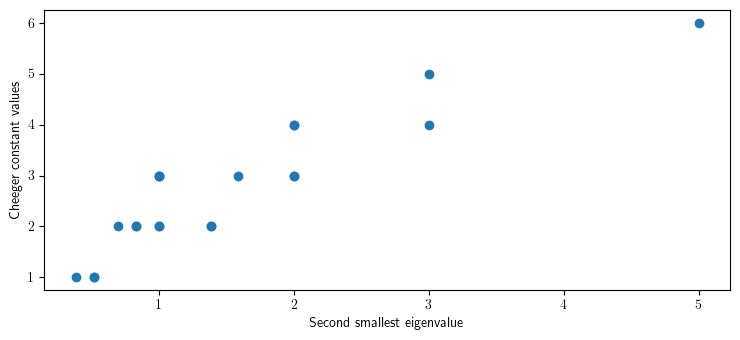

In [ ]:
plt.scatter(eigen2, Cg)
plt.xlabel("Second smallest eigenvalue")
plt.ylabel("Cheeger constant values")
plt.savefig(f'cg_sec{n}.png', dpi=150)

In [ ]:
r1 = [i for i in range(len(eigen2))]
df = pd.DataFrame(data={'r1': r1, 'eigen2': eigen2, 'cheeger': Cg})
fig = px.scatter(df, x='eigen2', y='cheeger', title="eigen2 vs cheeger", hover_data=['r1'])

fig.show()

In [ ]:
print(scipy.stats.pearsonr(eigen2,Cg))

PearsonRResult(statistic=0.9068541208774039, pvalue=1.4622340862374265e-08)


In [ ]:
# This is not the right approach so ignore

D_list

[2, 2, 2, 3, 2, 2, 2, 2, 3, 4, 5, 3, 4, 5, 4, 3, 3, 2, 2, 2, 5]

In [ ]:
adj_mats[9]

array([[0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0]])

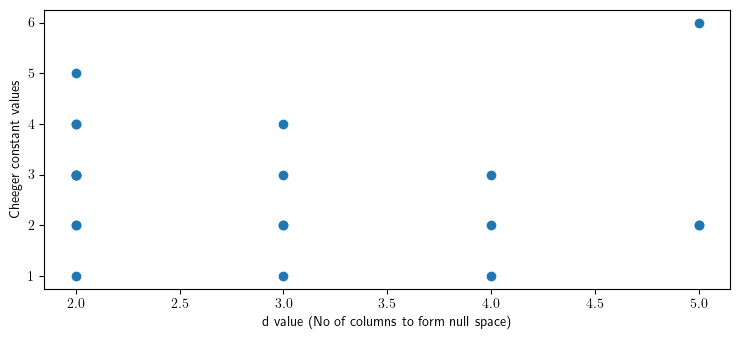

In [ ]:
plt.scatter(D_list, Cg)

plt.xlabel("d value (No of columns to form null space) ")

plt.ylabel("Cheeger constant values")

plt.savefig(f'd_val_vs_cg{n}.png', dpi=150)

In [ ]:
print(scipy.stats.pearsonr(D_list,Cg))

PearsonRResult(statistic=-0.042626387646288316, pvalue=0.8544369401558385)


In [ ]:
print(scipy.stats.pearsonr(eigen2,D_list))

PearsonRResult(statistic=0.11693913754552657, pvalue=0.6136947925586473)
